<a href="https://colab.research.google.com/github/tanakakao/test/blob/main/uma_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.metrics import r2_score

In [ ]:
race_results = pd.concat([pd.read_csv('C:/Users/tanak/Downloads/result_year-20210621T041551Z-001/result_year/race_result_'+str(year)+'.csv') for year in range(2016,2020)])
race_infos = pd.concat([pd.read_csv('C:/Users/tanak/Downloads/race_info-20210621T041556Z-001/race_info/race_info_'+str(year)+'.csv') for year in range(2016,2020)])

In [ ]:
test_results = pd.read_csv('C:/Users/tanak/Downloads/result_year-20210621T041551Z-001/result_year/race_result_2020.csv')
test_infos = pd.read_csv('C:/Users/tanak/Downloads/race_info-20210621T041556Z-001/race_info/race_info_2020.csv')

In [ ]:
race_results.head()

,レースID,着順,枠番,馬番,馬名,馬ID,性齢,斤量,騎手,調教師,馬主,タイム,着差,通過,上り,単勝,人気,馬体重,馬体重増減
0,201601010101,1,6,6,ニシノキララコ,2014102322,牝2,52.0,井上敏樹,[東] 萱野浩二,西山茂行,1:50.5,NaN,5-5-6-4_,35.3,49.6,8.0,434,-4
1,201601010101,2,2,2,ユノディエール,2014105971,牡2,54.0,四位洋文,[西] 岡田稲男,ＫＴレーシング,1:50.8,2_,8-7-7-6_,35.3,29.6,7.0,438,-2
2,201601010101,3,5,5,マイネルヘミニス,2014100723,牡2,54.0,丹内祐次,[東] 高橋祥泰,サラブレッドクラブ・ラフィアン,1:51.1,1.1/2_,1-1-1-1_,36.4,12.4,4.0,458,-2
3,201601010101,4,4,4,プラチナヴォイス,2014105192,牡2,51.0,坂井瑠星,[西] 鮫島一歩,本間茂,1:51.1,アタマ_,3-3-3-2_,36.2,4.2,2.0,500,-4
4,201601010101,5,3,3,スピリットソウル,2014106056,牡2,54.0,福永祐一,[西] 大久保龍,落合幸弘,1:51.1,クビ_,2-2-3-2_,36.2,1.7,1.0,468,2


In [ ]:
def preprocess(df_results, df_info):
    race_info_results = pd.merge(df_results[['レースID', '枠番', '馬番', '性齢','斤量', 'タイム', '単勝', '人気', '馬体重', '馬体重増減']], df_info[['レースID', 'コース名', 'レース番号', 'コース', '距離', '左右', '馬場状態', '天候']], on='レースID', how='left')
    race_info_results = race_info_results.loc[(race_info_results['コース']!='障')&(race_info_results['コース']!='障芝ダート'),:]
    race_info_results = race_info_results.loc[race_info_results['左右']!='直線',:]
    race_info_results = race_info_results.loc[~(race_info_results['人気'].isna()),:]
    race_info_results = race_info_results.loc[(race_info_results['馬体重']!='計不'),:]
    race_info_results = race_info_results.loc[~(race_info_results['タイム'].isna()),:]
    race_info_results['年齢'] = race_info_results['性齢'].str.extract('(\d+)')
    race_info_results['性別'] = race_info_results['性齢'].str.extract('(.)\d+')
    race_info_results['左右'] = race_info_results['左右'].str.extract('(.)?')

    time_calc = race_info_results['タイム'].str.split(':', expand=True)
    time_sec = time_calc[0].astype('float')*60 + time_calc[1].astype('float')
    race_info_results['タイム'] = time_sec

    race_info_results[['単勝','馬体重','年齢']] = race_info_results[['単勝','馬体重','年齢']].astype('float')
    race_info_results = race_info_results.drop(['レースID','性齢'], axis=1)

    race_results_dummies = pd.get_dummies(race_info_results, drop_first=True)
    return race_results_dummies

In [ ]:
race_results_dummies = preprocess(race_results, race_infos)

In [ ]:
test_results_dummies = preprocess(test_results, test_infos)

In [ ]:
from sklearn.linear_model import LinearRegression

X = race_results_dummies[['枠番', '馬番', '斤量', '単勝', '人気', '馬体重', '馬体重増減', 'レース番号', '距離',
       '年齢', 'コース名_中山', 'コース名_京都', 'コース名_函館', 'コース名_小倉', 'コース名_新潟', 'コース名_札幌',
       'コース名_東京', 'コース名_福島', 'コース名_阪神', 'コース_芝', '左右_左', '馬場状態_稍重', '馬場状態_良',
       '馬場状態_重', '天候_小雪', '天候_晴', '天候_曇', '天候_雨', '天候_雪', '性別_牝', '性別_牡']]

y = race_results_dummies['タイム']

regression = LinearRegression()
model = regression.fit(X, y)

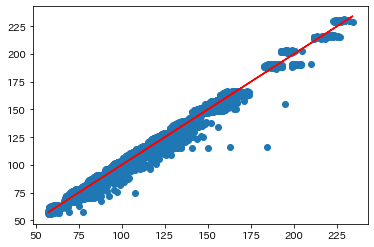

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y, model.predict(X))
plt.plot(y, y, 'red')

In [ ]:
X_test = test_results_dummies[['枠番', '馬番', '斤量', '単勝', '人気', '馬体重', '馬体重増減', 'レース番号', '距離',
       '年齢', 'コース名_中山', 'コース名_京都', 'コース名_函館', 'コース名_小倉', 'コース名_新潟', 'コース名_札幌',
       'コース名_東京', 'コース名_福島', 'コース名_阪神', 'コース_芝', '左右_左', '馬場状態_稍重', '馬場状態_良',
       '馬場状態_重', '天候_小雪', '天候_晴', '天候_曇', '天候_雨', '天候_雪', '性別_牝', '性別_牡']]

y_test = test_results_dummies['タイム']

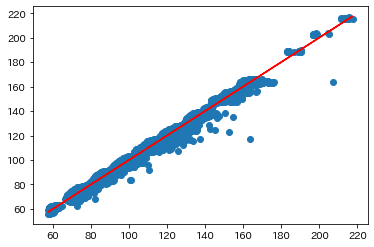

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, model.predict(X_test))
plt.plot(y_test, y_test, 'red')

In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y, model.predict(X)))
print(mean_squared_error(y_test, model.predict(X_test)))

3.5066899838591725
4.220612725961075


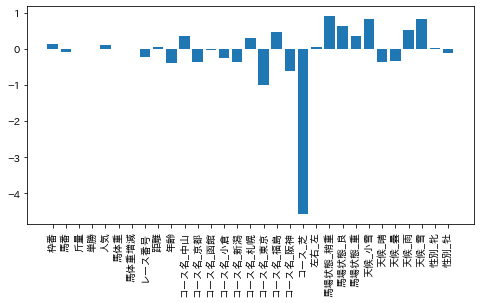

In [ ]:
import japanize_matplotlib

plt.figure(figsize=(8,4))

plt.bar(X.columns, model.coef_);
plt.xticks(rotation=90);

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y)

In [ ]:
import xgboost as xgb
from sklearn.metrics import log_loss

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
from sklearn.metrics import mean_squared_error

params = {'booster': 'gbtree',
         'objective': 'reg:squarederror'}
num_round = 100

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
model = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=20)

va_pred = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
score = mean_squared_error(y_val, va_pred)
print(score)

pred = model.predict(dtest, ntree_limit=model.best_ntree_limit)
#print(np.sum((pred>=0.5)==(y_test))/len(y_test))

[0]	train-rmse:71.00267	eval-rmse:71.06568
[1]	train-rmse:49.72673	eval-rmse:49.76869
[2]	train-rmse:34.83942	eval-rmse:34.86709
[3]	train-rmse:24.42614	eval-rmse:24.44291
[4]	train-rmse:17.14610	eval-rmse:17.15667
[5]	train-rmse:12.06550	eval-rmse:12.07131
[6]	train-rmse:8.53001	eval-rmse:8.53262
[7]	train-rmse:6.08229	eval-rmse:6.08337
[8]	train-rmse:4.40771	eval-rmse:4.40708
[9]	train-rmse:3.28432	eval-rmse:3.28440
[10]	train-rmse:2.55361	eval-rmse:2.55425
[11]	train-rmse:2.09697	eval-rmse:2.09862
[12]	train-rmse:1.82806	eval-rmse:1.83136
[13]	train-rmse:1.67206	eval-rmse:1.67717
[14]	train-rmse:1.58305	eval-rmse:1.59006
[15]	train-rmse:1.53308	eval-rmse:1.54125
[16]	train-rmse:1.49421	eval-rmse:1.50405
[17]	train-rmse:1.47667	eval-rmse:1.48791
[18]	train-rmse:1.46467	eval-rmse:1.47742
[19]	train-rmse:1.45426	eval-rmse:1.46727
[20]	train-rmse:1.44670	eval-rmse:1.46189
[21]	train-rmse:1.44010	eval-rmse:1.45631
[22]	train-rmse:1.42679	eval-rmse:1.44271
[23]	train-rmse:1.42321	eval-rms

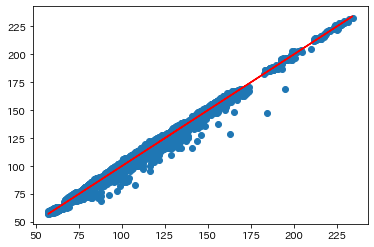

In [ ]:
plt.scatter(y_train, model.predict(dtrain, ntree_limit=model.best_ntree_limit))
plt.plot(y_train, y_train, "red")

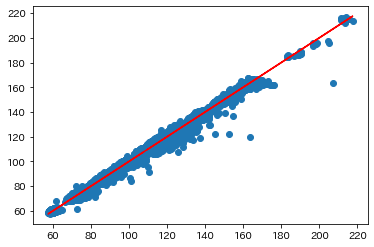

In [ ]:
plt.scatter(y_test, pred)
plt.plot(y_test, y_test, "red")

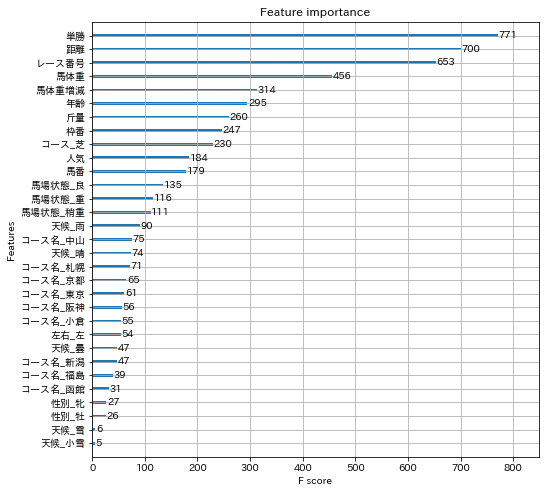

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111)

xgb.plot_importance(model, ax=ax);

In [ ]:
print(mean_squared_error(y_train, model.predict(dtrain, ntree_limit=model.best_ntree_limit)))
print(mean_squared_error(y_test, model.predict(dtest, ntree_limit=model.best_ntree_limit)))

1.679106960498608
2.6047485541940616
